### Задание 1 
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


In [3]:
california = fetch_california_housing()
data = california["data"]
feature_names = california["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [4]:
target = california["target"]

Y = pd.DataFrame(target, columns=["price"])
Y.head()

price
0  4.526
1  3.585
2  3.521
3  3.413
4  3.422

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
from sklearn.manifold import TSNE

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init=10, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)



In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [22]:
print('Первый кластер: ', Y_train[labels_train == 0].mean())
print('Второй кластер:', Y_train[labels_train == 1].mean())
print('Третий кластер:', Y_train[labels_train == 2].mean())

Первый кластер:  price    1.979968
dtype: float64
Второй кластер: price    2.142137
dtype: float64
Третий кластер: price    1.618831
dtype: float64


In [24]:
print('Первый кластер: ', X_train['MedInc'][labels_train == 0].mean())
print('Второй кластер:', X_train['MedInc'][labels_train == 1].mean())
print('Третий кластер:', X_train['MedInc'][labels_train == 2].mean())

Первый кластер:  3.824624679256163
Второй кластер: 3.9254161198738173
Третий кластер: 3.336701538461538


## Задание 3 *
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [26]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

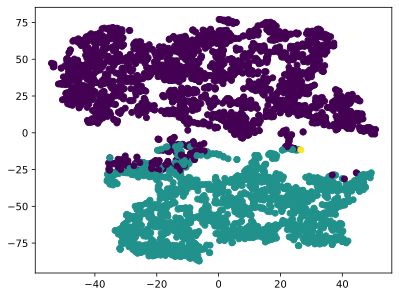

In [25]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [27]:
print('Первый кластер: ', X_test['MedInc'][labels_test == 0].mean())
print('Второй кластер:', X_test['MedInc'][labels_test== 1].mean())
print('Третий кластер:', X_test['MedInc'][labels_test== 2].mean())

Первый кластер:  3.8999336902800663
Второй кластер: 3.7304127133608005
Третий кластер: 4.625
